In [40]:
# Entrenamiento Latitudes y Longitudes
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo Tensor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2


In [41]:
# Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)

In [42]:
x_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour']
x = df[x_columns]
x.loc[:,'fc'] = x['fc']/1E6 
lat_columns = [f'lat_{i}' for i in range(1,101)]
long_columns = [f'long_{i}' for i in range(1,101)]
y_latitudes = df[lat_columns]
y_longitudes = df[long_columns]
#print(df['fc'].head(), x['fc'].head())

In [43]:
x_train, x_test, y_train_lat, y_test_lat, y_train_lon, y_test_lon = train_test_split(
    x, 
    y_latitudes, 
    y_longitudes, 
    test_size=0.2,  
    random_state=42  # Semilla para reproducibilidad
)

In [44]:
loss_weights = {'latitudes_output': 0.5, 'longitudes_output': 1.5}
l2_reg = 0.001
#Entrada
inputs = Input(shape =(10,))
#Codificación
encoded = Dense(8, activation = 'relu',kernel_regularizer=l2(l2_reg))(inputs)
encoded = Dense(16, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(32, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(128, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(156, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(180, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
# Decodificación separada
latitudes_output = Dense(100, activation = 'linear',kernel_regularizer=l2(l2_reg), name='latitudes_output')(encoded)
longitudes_output = Dense(100, activation='linear', kernel_regularizer=l2(l2_reg), name='longitudes_output')(encoded)
# Definimos el modelo con multiples salidas
autoencoder_Lat_Lon = Model(inputs,outputs=[latitudes_output,longitudes_output])
autoencoder_Lat_Lon.compile(optimizer = 'adamW', loss='mse',
                              loss_weights = loss_weights) #metrics = [custom_mse]
autoencoder_Lat_Lon.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 8)         │         88 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 16)        │        144 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 32)        │        544 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │      2,112 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 128)       │      8,320 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 156)       │     20,124 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 180)       │     28,260 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ latitudes_output    │ (None, 100)       │     18,100 │ dense_27[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ longitudes_output   │ (None, 100)       │     18,100 │ dense_27[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,792 (374.19 KB)

 Trainable params: 95,792 (374.19 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = autoencoder_Lat_Lon.fit(
    x_train,
    [y_train_lat, y_train_lon],
    epochs=1500,
    batch_size=110,
    validation_split=0.2
)
#180 80

Epoch 1/1500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - latitudes_output_loss: 582.4557 - longitudes_output_loss: 2706.5557 - loss: 3290.2153 - val_latitudes_output_loss: 43.8850 - val_longitudes_output_loss: 120.4028 - val_loss: 165.1038
Epoch 2/1500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - latitudes_output_loss: 32.0623 - longitudes_output_loss: 110.0415 - loss: 142.6174 - val_latitudes_output_loss: 14.7673 - val_longitudes_output_loss: 81.1089 - val_loss: 96.4273
Epoch 3/1500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - latitudes_output_loss: 14.4918 - longitudes_output_loss: 83.4180 - loss: 98.3206 - val_latitudes_output_loss: 12.0127 - val_longitudes_output_loss: 75.5208 - val_loss: 88.0664
Epoch 4/1500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - latitudes_output_loss: 12.4470 - longitudes_output_loss: 77.9045 - loss: 90.7156 - val_latitudes_output_loss: 10.0371 - val_longitudes_output_loss: 70.4064 - val_loss: 80.9558
Epoch 5/1500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - latitudes_output_

In [46]:
loss = autoencoder_Lat_Lon.evaluate(
    x_test, 
    [y_test_lat, y_test_lon]
)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - latitudes_output_loss: 0.1316 - longitudes_output_loss: 1.9986 - loss: 2.4142


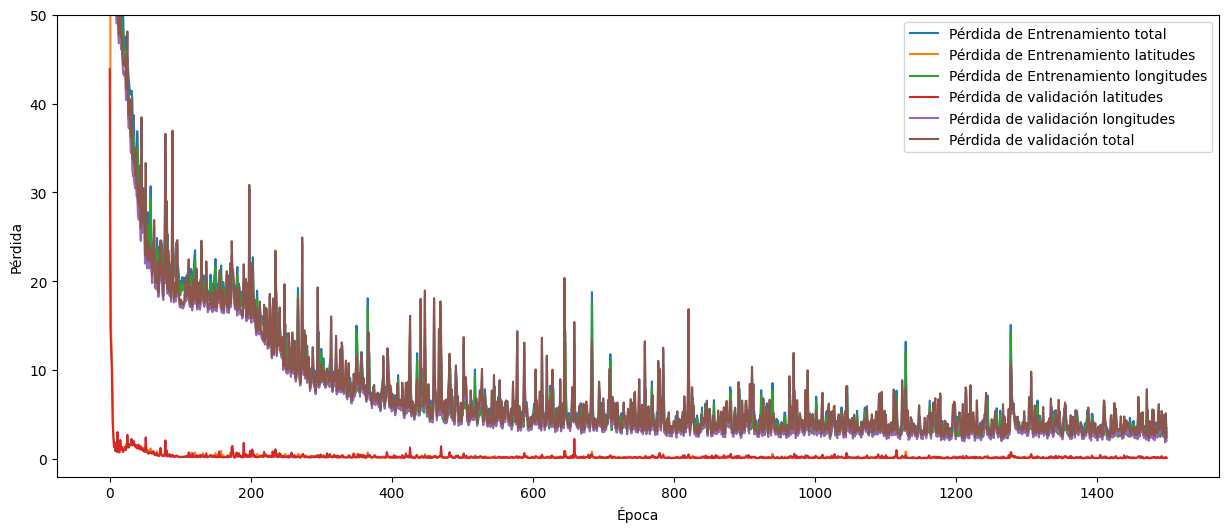

In [47]:
# Función de Pérdida durante el entrenamiento
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label = 'Pérdida de Entrenamiento total')
plt.plot(history.history['latitudes_output_loss'], label = 'Pérdida de Entrenamiento latitudes')
plt.plot(history.history['longitudes_output_loss'], label = 'Pérdida de Entrenamiento longitudes')
plt.plot(history.history['val_latitudes_output_loss'], label = 'Pérdida de validación latitudes')
plt.plot(history.history['val_longitudes_output_loss'], label = 'Pérdida de validación longitudes')
plt.plot(history.history['val_loss'], label = 'Pérdida de validación total')



plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.ylim(-2,50)
plt.legend()
plt.show()

In [48]:
# permite el calculo de pesos y bias de las diferentes capas
    # for layer in autoencoder_Lat_Lon.layers:
    #     if len(layer.get_weights()) > 0:  # Solo capas con pesos
    #         weights, biases = layer.get_weights()
    #         print(f"Pesos de la capa '{layer.name}':\n{weights}")
    #         print(f"Bias de la capa '{layer.name}':\n{biases}")



In [49]:
# guarda los pesos y bias (observar la direccion)
# for layer in autoencoder_Lat_Lon.layers:
#     if len(layer.get_weights()) > 0:
#         weights, biases = layer.get_weights()
#         np.save(f"{layer.name}_weights.npy", weights)
#         np.save(f"{layer.name}_biases.npy", biases)
#         print(f"Pesos y bias de '{layer.name}' guardados.")

In [50]:
# Calculo de la penanización 
# l2_reg = 0.001  # El valor que configuraste
# total_penalty = 0

# for layer in autoencoder_Lat_Lon.layers:
#     if len(layer.get_weights()) > 0:
#         weights, _ = layer.get_weights()
#         penalty = l2_reg * np.sum(np.square(weights))
#         total_penalty += penalty
#         print(f"Penalización L2 para la capa '{layer.name}': {penalty}")

# print(f"Penalización L2 total: {total_penalty}")

In [ ]:
save_model = False

if save_model == True:
  autoencoder_Lat_Lon.save('modelos_entrenamiento/entrenamiento_lat_lon_1500_110.keras')

In [ ]:
# 722us/step - latitudes_output_loss: 0.1987 - longitudes_output_loss: 3.1349 - loss: 3.6267 /// entrenamiento_lat_lon_500_160-AdamW
# 0s 1ms/step - latitudes_output_loss: 0.0987 - longitudes_output_loss: 3.3757 - loss: 3.7617 /// entrenamiento_lat_lon_500_160-Adam
# 0s 803us/step - latitudes_output_loss: 0.1229 - longitudes_output_loss: 6.3087 - loss: 6.7458 /// entrenamiento_lat_lon_500_180-Adam
# 0s 1ms/step - latitudes_output_loss: 0.1294 - longitudes_output_loss: 3.5970 - loss: 4.0475 /// entrenamiento_lat_lon_600_200-AdamW
# 0s 2ms/step - latitudes_output_loss: 0.2974 - longitudes_output_loss: 8.7674 - loss: 9.3573 /// entrenamiento_lat_lon_600_220-AdamW
# 0s 680us/step - latitudes_output_loss: 0.5081 - longitudes_output_loss: 6.5019 - loss: 7.3450 /// Idem 
# 0s 1ms/step - latitudes_output_loss: 0.2419 - longitudes_output_loss: 2.6327 - loss: 3.1476 /// entrenamiento_lat_lon_1000_100-AdamW
# 0s 876us/step - latitudes_output_loss: 0.0836 - longitudes_output_loss: 1.8075 - loss: 2.1910 /// entrenamiento_lat_lon_1000_110-AdamW
# 0s 1ms/step - latitudes_output_loss: 0.1913 - longitudes_output_loss: 2.1822 - loss: 2.6761 /// entrenamiento_lat_lon_1000_120-AdamW
# 0s 1ms/step - latitudes_output_loss: 0.0883 - longitudes_output_loss: 2.7947 - loss: 3.1762 /// entrenamiento_lat_lon_1000_130-AdamW
# 0s 1ms/step - latitudes_output_loss: 0.0691 - longitudes_output_loss: 2.4441 - loss: 2.8621 /// entrenamiento_lat_lon_1000_150-AdamW
# 0s 763us/step - latitudes_output_loss: 0.1005 - longitudes_output_loss: 2.6210 - loss: 2.9834 /// entrenamiento_lat_lon_1000_180-AdamW
# 0s 840us/step - latitudes_output_loss: 0.1316 - longitudes_output_loss: 1.9986 - loss: 2.4142 /// entrenamiento_lat_lon_1500_110-AdamW